In [4]:
from matplotlib.colors import ListedColormap
import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#from sklearn.metrics import plot_roc_curve
#from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [5]:

def mostrar(X, y, clasificador=None, title=None):
    """
    Esta función muestra las fronteras de decisión del clasificador ya entrenado y los ejemplos en X
    (con el color dependiendo de y).
    :param clasificador: Clasificador entrenado de scikit-learn
    :param X: Matriz con los ejemplos a mostrar
    :param y: Vector con las salidas de los ejemplos a mostrar
    :return: Nada
    """
    # Creamos los mapas de colores a utilizar
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])

    # Creamos la figura
    plt.figure(figsize=(10,8))

    # Primer plot a la izquierda
    plt.subplot(111)

    if clasificador is not None:
        # Preparamos los ejemplos de entrada para poder pintar la frontera de decisión
        # Asignamos una clase (color) a cada ejemplo de la malla en [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() * 0.9-0.05, X[:, 0].max() * 1.1
        y_min, y_max = X[:, 1].min() * 0.9-0.05, X[:, 1].max() * 1.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        # Clasificamos los puntos
        # <RELLENAR>
        Z = clasificador.predict(np.hstack((xx.reshape(-1,1),yy.reshape(-1,1))))
        # Ponemos el resultado en el formato deseado
        # <RELLENAR>
        Z = Z.reshape(xx.shape)
        # Pintamos las fronteras
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    
    # Pintamos los puntos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=60)
    # Asignamos el título
    plt.xlabel('Variable 1')
    plt.ylabel('Variable 2')
    if title is None:
        plt.title("Ejemplos de Train")
    else:
        # Establecemos el título recibido como parámetro
        # <RELLENAR>
        plt.title(title)    
    
    if clasificador is not None:
        # Establecemos los límites
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())

    
    # Mostramos la figura
    plt.show()
    return

In [34]:
#!pip install imblearn
#from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import load_breast_cancer
from imblearn.datasets import make_imbalance

data = load_breast_cancer()
X, y = data.data, data.target
print('Distribution before imbalancing: {}'.format(Counter(y)))
print("Total samples: {}".format(X.shape[0]))

Distribution before imbalancing: Counter({1: 357, 0: 212})
Total samples: 569


Distribution after imbalancing: Counter({1: 357, 0: 12})


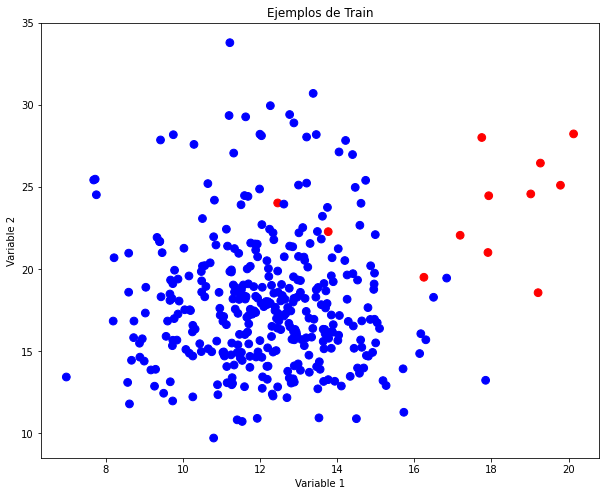

In [35]:
X_imb, y_imb = make_imbalance(X, y,sampling_strategy={0: 12, 1: 357},random_state=42)
print('Distribution after imbalancing: {}'.format(Counter(y_imb)))

Xtrain,ytrain = X_imb[:,:2],y_imb
mostrar(Xtrain,ytrain)

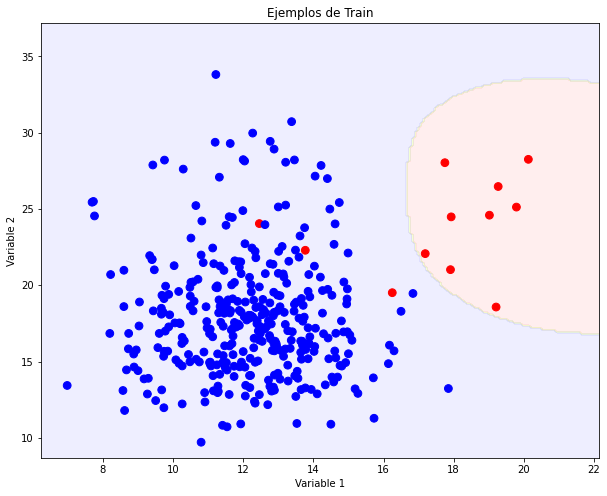

In [36]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(Xtrain,ytrain)
mostrar(Xtrain,ytrain,clf)

In [37]:
from sklearn.metrics import accuracy_score

#debería haber test
predicted = clf.predict(Xtrain)

# get the accuracy"
print(accuracy_score(ytrain, predicted))

0.991869918699187


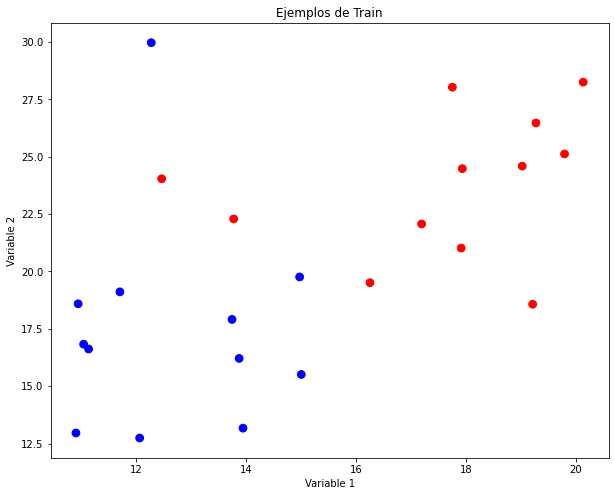

Resampled dataset shape Counter({0: 12, 1: 12})
0.8617886178861789


In [38]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(Xtrain, ytrain)
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
#Resampled dataset shape Counter({0: 100, 1: 100})
clfRes = SVC()
clfRes.fit(X_res,y_res)
#debería haber test
predicted = clfRes.predict(Xtrain)
# get the accuracy"
print(accuracy_score(ytrain, predicted))

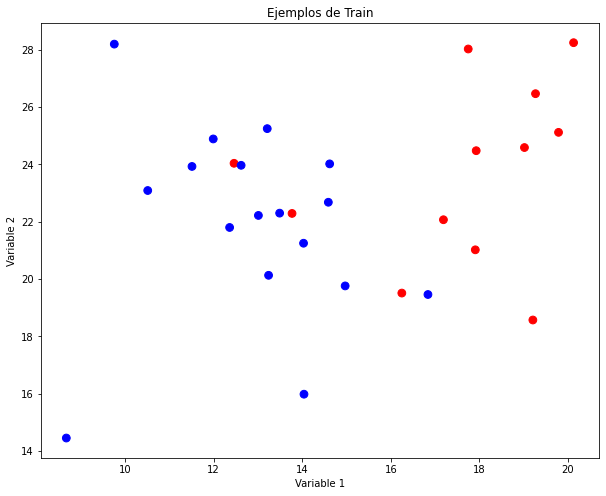

Resampled dataset shape Counter({1: 17, 0: 12})
0.989159891598916


In [39]:
from imblearn.under_sampling import CondensedNearestNeighbour # doctest: +SKIP
cnn = CondensedNearestNeighbour(random_state=42) # doctest: +SKIP
X_res, y_res = cnn.fit_resample(Xtrain, ytrain) #doctest: +SKIP
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
clfCNN = SVC()
clfCNN.fit(X_res,y_res)
#debería haber test
predicted = clfCNN.predict(Xtrain)
# get the accuracy"
print(accuracy_score(ytrain, predicted))

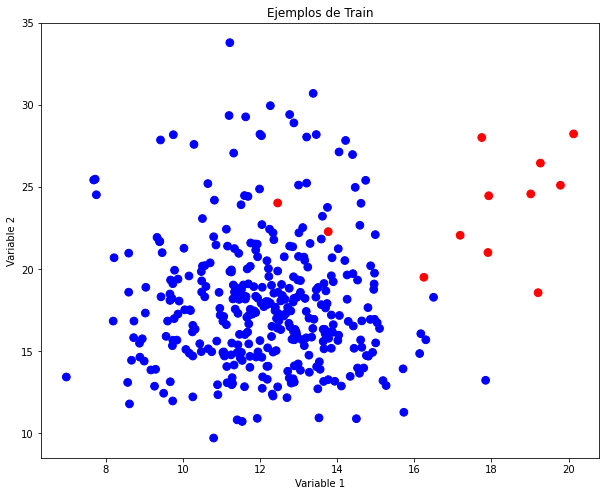

Resampled dataset shape Counter({1: 354, 0: 12})
0.991869918699187


In [40]:
from imblearn.under_sampling import TomekLinks # doctest: +SKIP
tl = TomekLinks()
X_res, y_res = tl.fit_resample(Xtrain, ytrain) #doctest: +SKIP
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
clfTL = SVC()
clfTL.fit(X_res,y_res)
#debería haber test
predicted = clfTL.predict(Xtrain)
# get the accuracy"
print(accuracy_score(ytrain, predicted))

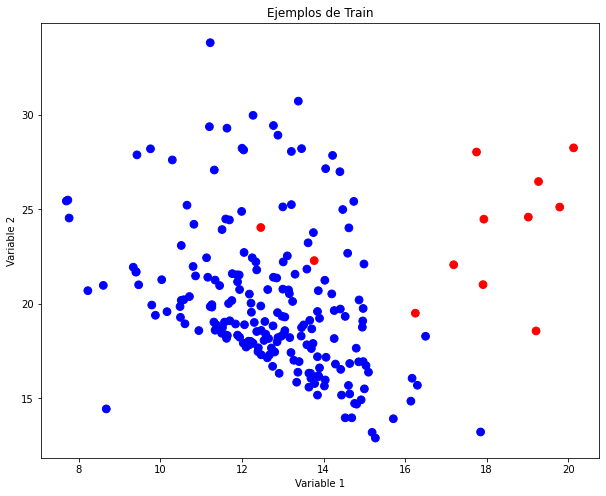

Resampled dataset shape Counter({1: 201, 0: 12})
0.991869918699187


In [41]:
from imblearn.under_sampling import OneSidedSelection # doctest: +SKIP
oss = OneSidedSelection(random_state=42) # doctest: +SKIP
X_res, y_res = oss.fit_resample(Xtrain, ytrain) #doctest: +SKIP
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
clfOSS = SVC()
clfOSS.fit(X_res,y_res)
#debería haber test
predicted = clfOSS.predict(Xtrain)
# get the accuracy"
print(accuracy_score(ytrain, predicted))

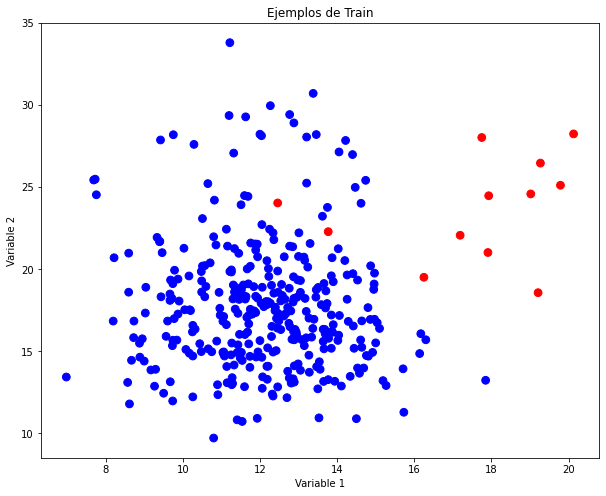

Resampled dataset shape Counter({1: 347, 0: 12})
0.991869918699187


In [42]:
from imblearn.under_sampling import EditedNearestNeighbours # doctest: +SKIP
enn = EditedNearestNeighbours() # doctest: +SKIP
X_res, y_res = enn.fit_resample(Xtrain, ytrain) #doctest: +SKIP
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
clfENN = SVC()
clfENN.fit(X_res,y_res)
#debería haber est
predicted = clfENN.predict(Xtrain)
# get the accuracy"
print(accuracy_score(ytrain, predicted))

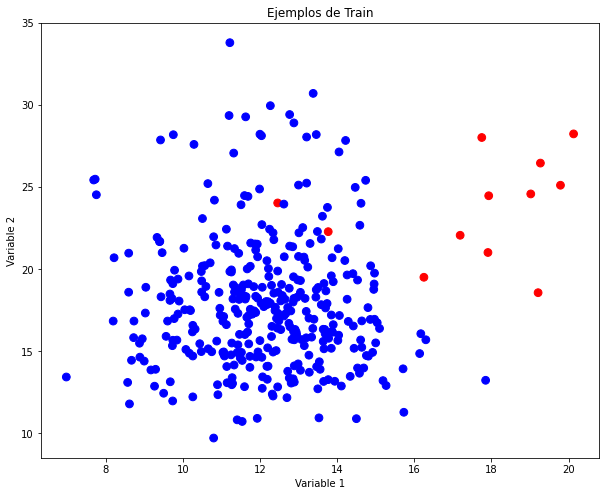

Resampled dataset shape Counter({1: 353, 0: 12})
0.991869918699187


In [43]:
from imblearn.under_sampling import NeighbourhoodCleaningRule # doctest: +SKIP
ncr = NeighbourhoodCleaningRule() # doctest: +SKIP
X_res, y_res = ncr.fit_resample(Xtrain, ytrain) #doctest: +SKIP
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
clfNCR = SVC()
clfNCR.fit(X_res,y_res)
#debería haber test
predicted = clfNCR.predict(Xtrain)
# get the accuracy"
print(accuracy_score(ytrain, predicted))

# Creating an unbalanced datasest and training a SVC classifier

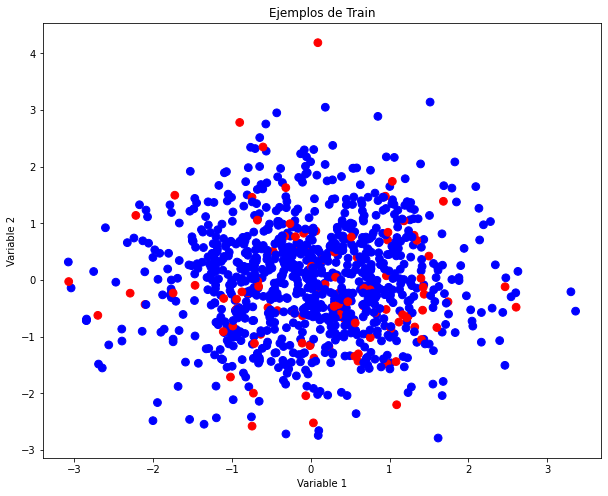

Original dataset shape Counter({1: 900, 0: 100})
0.998


In [26]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
mostrar(X,y)
print('Original dataset shape %s' % Counter(y))
#Original dataset shape Counter({1: 900, 0: 100})
clf = SVC()
clf.fit(X,y)
#debería haber test
predicted = clf.predict(X)
# get the accuracy"
print(accuracy_score(y, predicted))

# RANDOM UNDERSAMPLING

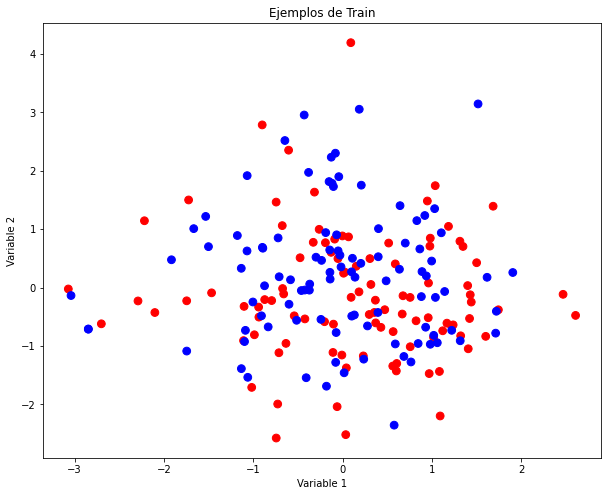

Resampled dataset shape Counter({0: 100, 1: 100})
0.991


In [27]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
#Resampled dataset shape Counter({0: 100, 1: 100})
clfRes = SVC()
clfRes.fit(X_res,y_res)
#debería haber test
predicted = clfRes.predict(X)
# get the accuracy"
print(accuracy_score(y, predicted))

# CNN

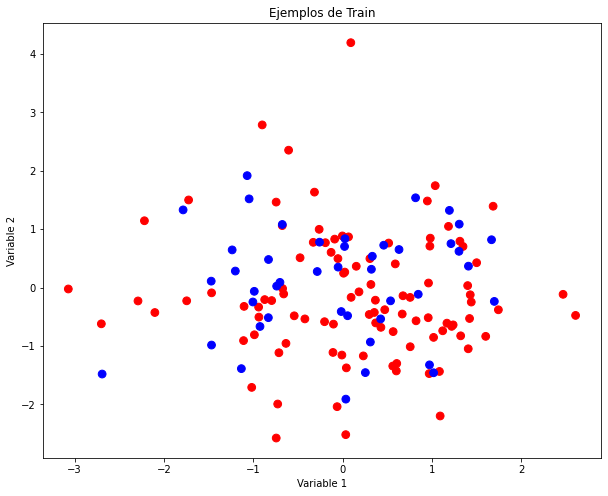

Resampled dataset shape Counter({0: 100, 1: 44})
0.996


In [28]:
from imblearn.under_sampling import CondensedNearestNeighbour # doctest: +SKIP
cnn = CondensedNearestNeighbour(random_state=42) # doctest: +SKIP
X_res, y_res = cnn.fit_resample(X, y) #doctest: +SKIP
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
clfCNN = SVC()
clfCNN.fit(X_res,y_res)
#debería haber test
predicted = clfCNN.predict(X)
# get the accuracy"
print(accuracy_score(y, predicted))
#Resampled dataset shape Counter({-1: 268, 1: 227}) # doctest: +SKIP

# TOMEK LINKS

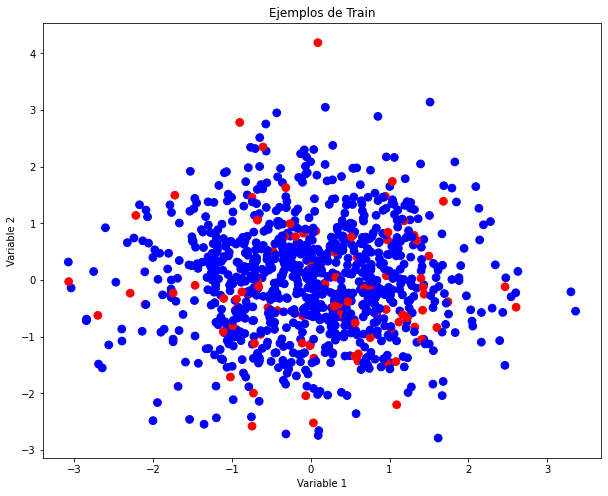

Resampled dataset shape Counter({1: 897, 0: 100})
0.998


In [30]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y) #doctest: +SKIP
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
clfTL = SVC()
clfTL.fit(X_res,y_res)
#debería haber test
predicted = clfTL.predict(X)
# get the accuracy"
print(accuracy_score(y, predicted))

# One-sided selection
Aplica secuencialmente CNN y Tomek Links

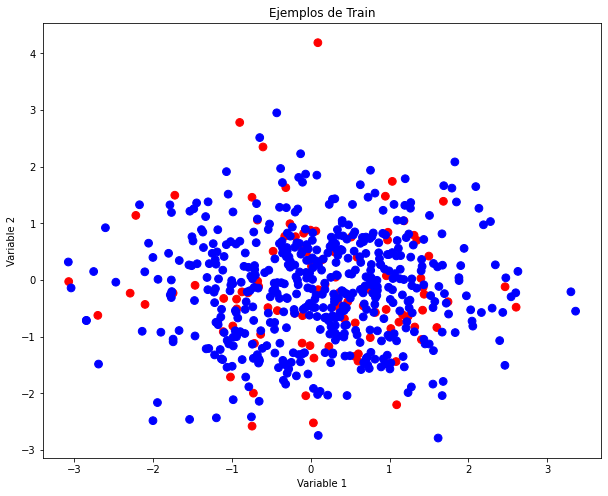

Resampled dataset shape Counter({1: 496, 0: 100})
0.998


In [31]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=42)
X_res, y_res = oss.fit_resample(X, y) #doctest: +SKIP
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
clfOSS = SVC()
clfOSS.fit(X_res,y_res)
#debería haber test
predicted = clfOSS.predict(X)
# get the accuracy"
print(accuracy_score(y, predicted))

# ENN
Elimina ejemplos de ambas clases

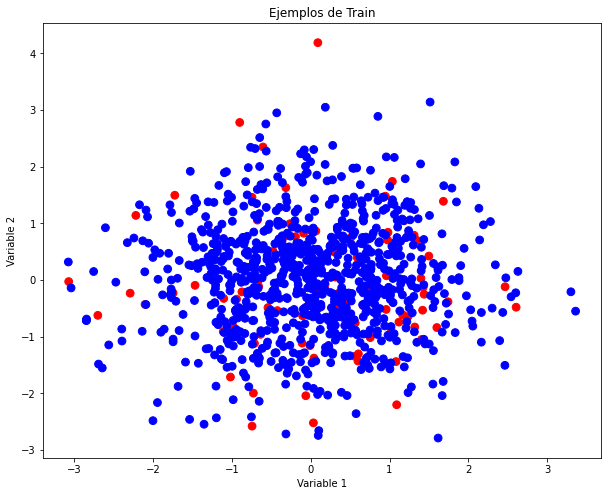

Resampled dataset shape Counter({1: 887, 0: 100})
0.996


In [32]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X, y) #doctest: +SKIP
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
clfENN = SVC()
clfENN.fit(X_res,y_res)
#debería haber test
predicted = clfENN.predict(X)
# get the accuracy"
print(accuracy_score(y, predicted))

# NCR
Modificación de ENN para incrementar la eliminación de ejemplos. Trata de eliminar ruido más que balancear el conjunto de ejemplos.

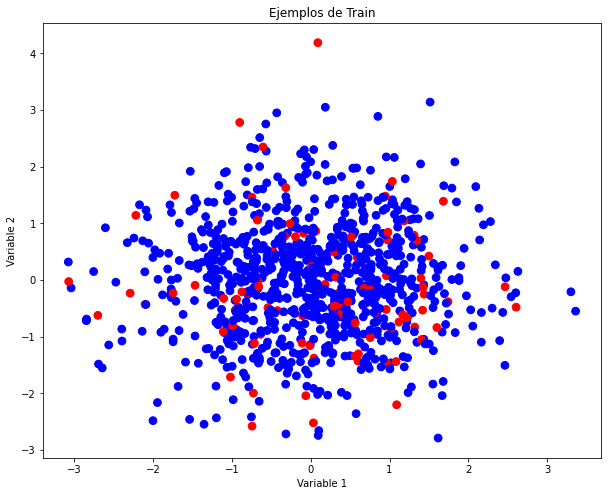

Resampled dataset shape Counter({1: 877, 0: 100})
0.997


In [33]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()
X_res, y_res = ncr.fit_resample(X, y) #doctest: +SKIP
mostrar(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res))
clfNCR = SVC()
clfNCR.fit(X_res,y_res)
#debería haber test
predicted = clfNCR.predict(X)
# get the accuracy"
print(accuracy_score(y, predicted))